# The tutorial for acoustic signal processing based on Deep Learning.

Introduction: This tutorial is from bilibili:【音频信号处理及深度学习教程_2.信号的时域分析幅值包络【新手极其友好】-哔哩哔哩】 https://b23.tv/PotbFPv


## 1.The features extraction of acoustic signal

### ① Amplitude Envelope
Operation: Find the maximum amplitude value in each frame, and connect the maximum amplitude values in each frame to the amplitude envelope.

Application: amplitude envelope can give the loudness (soundness) of the general information, especially sensitive to sudden signals

Function: Used for audio detection, audio classification, etc.

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1.Load the signal
wave_path = r"D:/Coding workplace/Tutorial_DL_Acoustic_Signal/Data/Speech@24kHz.wav"
waveform, sample_rate = librosa.load(wave_path,sr=None)

In [3]:
# 2. Define a function to calculate the corresponding amplitude envelope in each signal frame
def Calc_Amplitude_Envelope(waveform, frame_length,hop_length):
    """
    This function is used to calculate the amplitude envelope of each signal frame
    Parameters:
    - waveform: input signal
    - frame_length: the length of each frame
    - hop_length: the overlap between two frames
    """
    if len(waveform) % hop_length != 0 :
        frame_num = int((len(waveform) - frame_length)/hop_length) + 1
        pad_num = frame_num*hop_length + frame_length - len(waveform)
        waveform = np.pad(waveform,(0,pad_num), mode="wrap")
    frame_num = int((len(waveform) - frame_length)/hop_length) + 1
    waveform_ae = []
    for t in range(frame_num):
        current_frame = waveform[t*(frame_length-hop_length):t*(frame_length-hop_length)+frame_length]
        current_ae = max(current_frame)
        waveform_ae.append(current_ae)
    return np.array(waveform_ae)

In [4]:
# 3. Set the parmeters, frame length is set to 1024, and normally the hop length is the half of frame length
frame_size = 1024
hop_size = int(0.5 * frame_size)
waveform_AE = Calc_Amplitude_Envelope(waveform=waveform,frame_length=frame_size,hop_length=hop_size)


Text(76.09722222222221, 0.5, 'Amplitude')

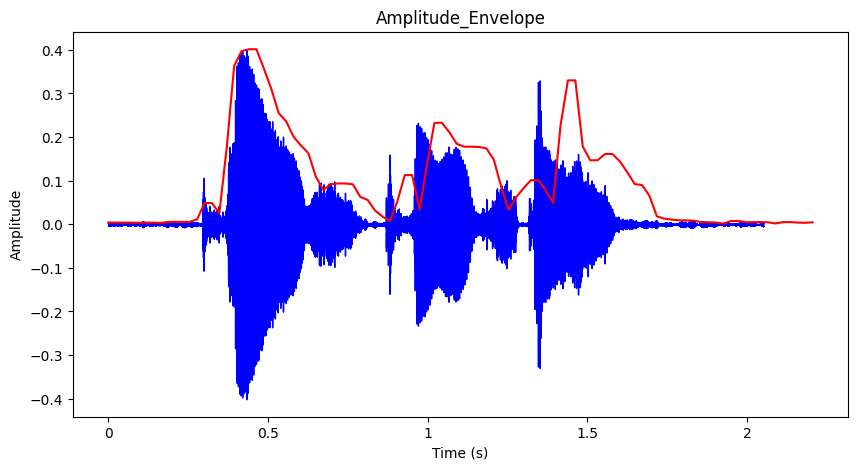

In [5]:
# 4. Plot the amplitude envelope of this speech signal
frame_scale = np.arange(0,len(waveform_AE))
time_scale = librosa.frames_to_time(frame_scale, hop_length=hop_size)
plt.figure(figsize=(10,5))
librosa.display.waveshow(waveform,sr=sample_rate,color='blue')
plt.plot(time_scale, waveform_AE, color="r")
plt.title('Amplitude_Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

### ② Root mean square energy
Operation: Find the RMSE in each frame in turn, the value of which is the square of the magnitude of the null point in the $i$th frame averaged over the square of the mean value, and then open the root sign.

Application: RMSE can show the variance of each frame, it can be used on analysis of unstationary signal. The waveform will be more stable compared the amplitude envelope, because RMSE uses the mean value of all the samples in each frame instead of using the maximum amplitude of each frame in amplitude envelope extraction.

Function: Used for audio detection, audio classification, etc.

In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 1.Load the signal
wave_path = r"D:/Coding workplace/Tutorial_DL_Acoustic_Signal/Data/Speech@24kHz.wav"
waveform, sample_rate = librosa.load(wave_path,sr=None)

In [8]:
# 2. Define function RMS

def Calc_RMS(waveform, frame_length, hop_length):
    """
    This function is used to calculate the RMSE of each frame
    Parameters:
    - waveform: input signal
    - frame_length: the length of frame
    - hop_length: the overlap between two frames.
    """
    num_samples = len(waveform)
    num_frames = int(np.ceil((num_samples - frame_length) / hop_length) + 1)
    total_samples_needed = num_frames * hop_length + frame_length
    pad_width = total_samples_needed - num_samples
    padded_waveform = np.pad(waveform, (0, pad_width), mode='constant')

    waveform_rms = []
    for i in range(num_frames):
        start_index = i * hop_length
        end_index = start_index + frame_length
        current_frame = padded_waveform[start_index:end_index]
        current_rms = np.sqrt(np.mean(current_frame**2))
        waveform_rms.append(current_rms)

    return waveform_rms


In [9]:
# 3. Set the parmeters, frame length is set to 1024, and normally the hop length is the half of frame length
frame_size = 1024
hop_size = int(0.5 * frame_size)
waveform_RMS = Calc_RMS(waveform=waveform,frame_length=frame_size,hop_length=hop_size)


Text(76.09722222222221, 0.5, 'Amplitude')

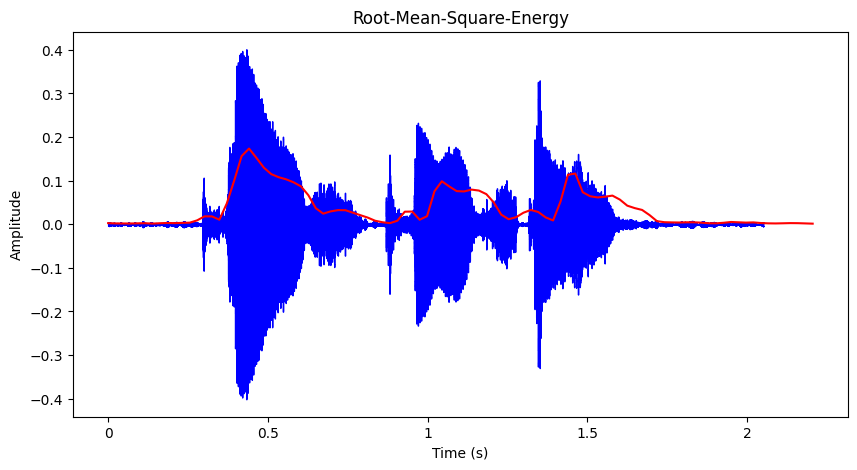

In [10]:
# 4. Plot the RMS of this speech signal
frame_scale = np.arange(0,len(waveform_RMS))
time_scale = librosa.frames_to_time(frame_scale)
plt.figure(figsize=(10,5))
librosa.display.waveshow(waveform,sr=sample_rate,color='blue')
plt.plot(time_scale, waveform_RMS, color="r")
plt.title('Root-Mean-Square-Energy')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

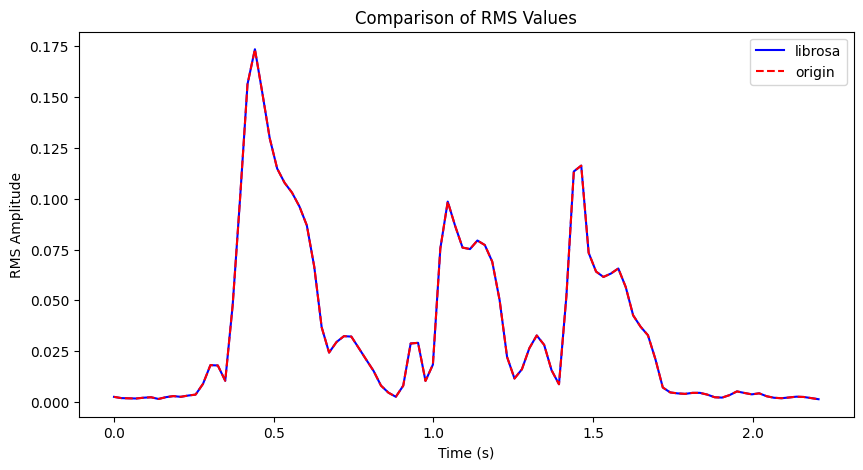

In [11]:
# 4. Compare with the librosa.feature.rms
waveform_RMS_librosa =  librosa.feature.rms(y=waveform,frame_length=frame_size,hop_length=hop_size).T[1:,0]
plt.figure(figsize=(10,5))
plt.plot(time_scale, waveform_RMS, color='blue',label='librosa')
plt.plot(time_scale, waveform_RMS_librosa,color='r',label='origin',linestyle='--')
plt.legend()
plt.title('Comparison of RMS Values')
plt.xlabel('Time (s)')
plt.ylabel('RMS Amplitude')
plt.show()

### ③ Zero crossing rate
Operation: is the ratio of the change of signal sign (positive and negative), i.e. the number of times the speech signal changes from positive to negative or vice versa in each frame, using the sgn sign function, if the sign of the previous point is opposite to the sign of the next point, then the absolute value of the subtraction is 2. If the sign of the previous point is the same as the sign of the next point, then the absolute value of the subtraction is 0.

Function: used for speech recognition or music information retrieval, effective for high impact sound processing.


In [12]:
# 1.Load the signal
wave_path = r"D:/Coding workplace/Tutorial_DL_Acoustic_Signal/Data/Speech@24kHz.wav"
waveform, sample_rate = librosa.load(wave_path,sr=None)

In [13]:
def Calc_ZCR(waveform, frame_length, hop_length):
    """
    This function is used to calculate the zero crossing rate of each frame
    Parameters:
    - waveform: input signal
    - frame_length: the length of frame
    - hop_length: the overlap between two frames.
    """
    num_samples = len(waveform)
    num_frames = int(np.ceil((num_samples - frame_length) / hop_length) + 1)
    total_samples_needed = num_frames * hop_length + frame_length
    pad_width = total_samples_needed - num_samples
    waveform = np.pad(waveform, (0, pad_width), mode='constant')

    waveform_zcr = []
    for t in range(num_frames):
        current_frame = waveform[(frame_length - hop_length)*t:(frame_length-hop_length)*t+frame_length]
        a = np.sign(current_frame[0:frame_length-1,])
        b = np.sign(current_frame[1:frame_length,])
        current_zcr = np.sum(np.abs(a-b))/2/frame_length
        waveform_zcr.append(current_zcr)

    return waveform_zcr

In [14]:
# 3. Set the parmeters, frame length is set to 1024, and normally the hop length is the half of frame length
frame_size = 1024
hop_size = int(0.5 * frame_size)
waveform_zcr= Calc_ZCR(waveform=waveform,frame_length=frame_size,hop_length=hop_size)


Text(76.09722222222221, 0.5, 'Amplitude')

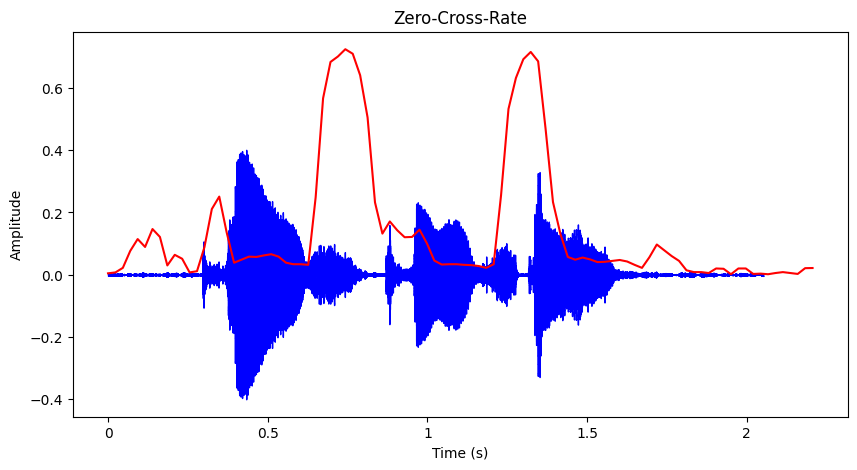

In [15]:
# 4. Plot the ZCR of this speech signal
frame_scale = np.arange(0,len(waveform_RMS))
time_scale = librosa.frames_to_time(frame_scale)
plt.figure(figsize=(10,5))
librosa.display.waveshow(waveform,sr=sample_rate,color='blue')
plt.plot(time_scale, waveform_zcr, color="r")
plt.title('Zero-Cross-Rate')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

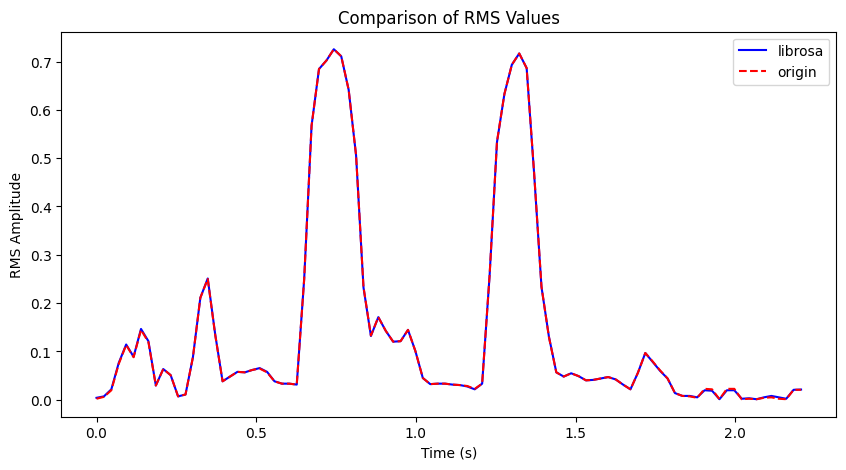

In [16]:
# 4. Compare with the librosa.feature.zcr
waveform_zcr_librosa =  librosa.feature.zero_crossing_rate(y=waveform,frame_length=frame_size,hop_length=hop_size).T[1:,0]
plt.figure(figsize=(10,5))
plt.plot(time_scale, waveform_zcr, color='blue',label='librosa')
plt.plot(time_scale, waveform_zcr_librosa,color='r',label='origin',linestyle='--')
plt.legend()
plt.title('Comparison of RMS Values')
plt.xlabel('Time (s)')
plt.ylabel('RMS Amplitude')
plt.show()

### ④ Spectrum centre of mass
Operation: It is the centre of gravity of the frequency components, the frequency weighted by energy averaged over a certain range in the spectrum, in Hz
SC = amplitude of each frame * sum of corresponding frequencies / sum of amplitudes of each frame


$centroid[t] = \sum_k S[k,t] * freq[k] / (\sum_{n} S[j,t])$

Function: The spectral centre of mass describes the brightness of a sound, sounds with dark, low quality tend to have more low frequency content, and their spectral centre of mass is relatively low, while sounds with bright, cheerful quality are mostly concentrated in the high frequencies, and their spectral centre of mass is high, this parameter is often used in analysing the timbre of musical instruments.


In [17]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


In [18]:
# 1.Load the signal
path_jazz = r"D:/Coding workplace/Tutorial_DL_Acoustic_Signal/Data/jazz.mp3"
jazz, sr_jazz = librosa.load(path_jazz,sr=None)

path_rock = r"D:/Coding workplace/Tutorial_DL_Acoustic_Signal/Data/rock.mp3"
rock, sr_rock = librosa.load(path_rock, sr=None)

path_blues = r"D:/Coding workplace/Tutorial_DL_Acoustic_Signal/Data/blues.mp3"
blues, sr_blues = librosa.load(path_blues, sr=None)

path_orchestra = r"D:/Coding workplace/Tutorial_DL_Acoustic_Signal/Data/orchestra.mp3"
orchestra, sr_orchestra = librosa.load(path_orchestra, sr=None)

In [19]:
# 2. Get the Signal Centroid
sc_jazz = librosa.feature.spectral_centroid(y=jazz, sr=sr_jazz,n_fft=2048).T[:,0]
sc_rock = librosa.feature.spectral_centroid(y=rock, sr=sr_rock,n_fft=2048).T[:,0]
sc_blues = librosa.feature.spectral_centroid(y=blues, sr=sr_blues,n_fft=2048).T[:,0]
sc_orchestra = librosa.feature.spectral_centroid(y=orchestra, sr=sr_orchestra,n_fft=2048).T[:,0]


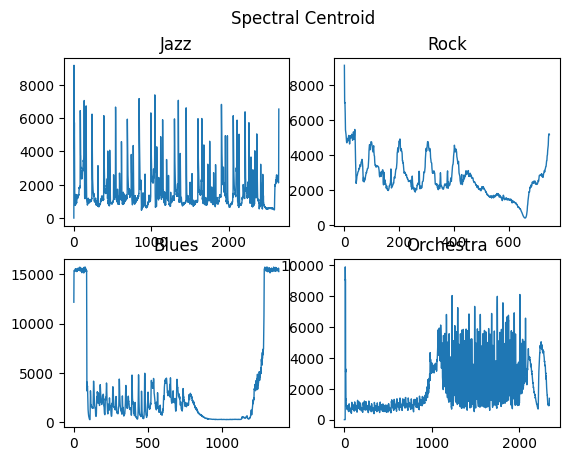

In [20]:
# ⑤ Plot the Signal Centroid
fig, aix = plt.subplots(2,2)
aix[0,0].plot(np.arange(0, len(sc_jazz)),sc_jazz,linewidth=1)
aix[0,0].set_title("Jazz")
aix[0,1].plot(np.arange(0, len(sc_rock)),sc_rock,linewidth=1)
aix[0,1].set_title("Rock")
aix[1,0].plot(np.arange(0, len(sc_blues)),sc_blues,linewidth=1)
aix[1,0].set_title("Blues")
aix[1,1].plot(np.arange(0, len(sc_orchestra)),sc_orchestra,linewidth=1)
aix[1,1].set_title("Orchestra")
fig.suptitle("Spectral Centroid")
plt.show()

### ③ Subband width
Operation: its spectral range in the spectral centroid, calculate the weighted average of the distance from each point to the center of mass of the spectrum
BW = Absolute value of the spectral center of mass subtracted from each sample point * Sum of the weights of the corresponding points/total weights.

Function: Used for audio recognition and subjective listening experience, if the energy spectral density function of the audio decreases rapidly, then the BW also decreases, similar to the rate of change of the frequency spectrum.



In [21]:
# 1. Get the signal subband width
sw_jazz = librosa.feature.spectral_bandwidth(y=jazz, sr=sr_jazz,n_fft=2048).T[:,0]
sw_rock = librosa.feature.spectral_bandwidth(y=rock, sr=sr_rock,n_fft=2048).T[:,0]
sw_blues = librosa.feature.spectral_bandwidth(y=blues, sr=sr_blues,n_fft=2048).T[:,0]
sw_orchestra = librosa.feature.spectral_bandwidth(y=orchestra, sr=sr_orchestra,n_fft=2048).T[:,0]


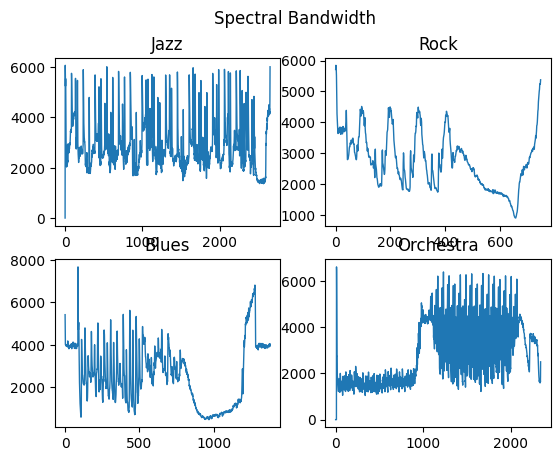

In [22]:
# 2. Plot the Signal Bandwidth
fig, aix = plt.subplots(2,2)
aix[0,0].plot(np.arange(0, len(sw_jazz)),sw_jazz,linewidth=1)
aix[0,0].set_title("Jazz")
aix[0,1].plot(np.arange(0, len(sw_rock)),sw_rock,linewidth=1)
aix[0,1].set_title("Rock")
aix[1,0].plot(np.arange(0, len(sw_blues)),sw_blues,linewidth=1)
aix[1,0].set_title("Blues")
aix[1,1].plot(np.arange(0, len(sw_orchestra)),sw_orchestra,linewidth=1)
aix[1,1].set_title("Orchestra")
fig.suptitle("Spectral Bandwidth")
plt.show()

### ⑥ STFT
Operation: Because acoustic signals tend to be time-varying and can be approximated as smooth signals over a short period of time, we use a window to cut off the sound to observe its changes over time, and we can obtain spectrograms (energy distributions) at different moments and at different frequencies.

If the window function bandwidth is long, the fine structure in the envelope is less and sparse, and the narrowband spectrogram is obtained, which has better frequency domain resolution but poorer time domain resolution; whereas, if the window function bandwidth is narrow, the fine structure in the envelope is more and denser, and the broadband spectrogram is obtained, which has better time domain resolution but poorer frequency domain resolution.



In [23]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# 1.Load the signal
wave_path = r"D:/Coding workplace/Tutorial_DL_Acoustic_Signal/Data/Speech@24kHz.wav"
waveform, sample_rate = librosa.load(wave_path,sr=None)

In [25]:
# 2.Divided into frames (zero padding and window)
frame_size, hop_size = 1024,512
# zero padding
if len(waveform) % hop_size != 0:
    frame_num = int((len(waveform) - frame_size) / hop_size) + 1
    pad_num = frame_num*hop_size + frame_size - len(waveform)
    waveform = np.pad(waveform,pad_width=(0, pad_num), mode='wrap')
frame_num = int((len(waveform) - frame_size) / hop_size) + 1
# divide into frames
row = np.tile(np.arange(0, frame_size),(frame_num, 1))
column = np.tile(np.arange(0, frame_num*(frame_size-hop_size),(frame_size-hop_size)),(frame_size, 1)).T
index = row + column
# print(row)
# print(column)
# print(index)
waveform_frame = waveform[index]

In [39]:
# 3.Add window
waveform_frame = waveform_frame * np.hanning(frame_size)
# 4.Fourier transform
n_fft=1024
waveform_stft = np.fft.rfft(waveform_frame,n_fft)
# 5. PWD waveform_pow = np.abs(waveform_fft)**2/n_fft
waveform_pow = np.abs(waveform_stft)**2/n_fft
waveform_db = 20 * np.log10(waveform_pow)
waveform_db_t = waveform_db.T

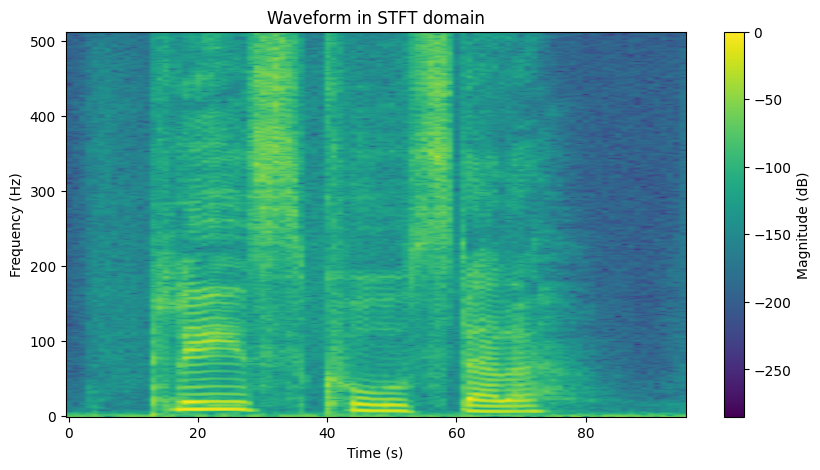

In [41]:
# 6. plot the wave
plt.figure(figsize=(10, 5))
plt.imshow(waveform_db_t, aspect='auto', origin='lower')
y_ticks = np.arange(0, int(n_fft/2), 100)  # 这里可能需要根据你的频率范围调整
plt.title('Waveform in STFT domain')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude (dB)')
plt.show()

In [28]:
# 7.Use the librosa.stft to analyse signal
n_fft = 1024
hop_size = 512
waveform_stft = librosa.stft(y=waveform, n_fft=n_fft,hop_length=hop_size)


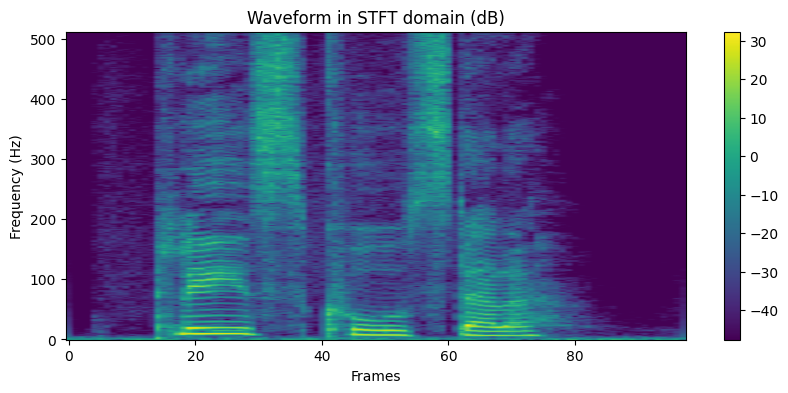

In [30]:
from plot_tools import plot_waveform_td, plot_waveform_fd, plot_waveform_stft
plot_waveform_stft(np.abs(waveform_stft))

### ⑦ wavelet
Operation: Compared to STFT, the window function of STFT framing is fixed time length, and the same window length framing will make the reduction of frequency resolution, because the window function is limited in length, it will cause truncation. And the longer the window function, then the time resolution will be low and the frequency resolution becomes high and vice versa.
The wavelet transform makes certain changes in this, by changing the bandwidth of the wavelet function, setting different fundamental frequencies, using different resolutions for different frequency bands, using high frequency resolution for low frequency components and high time resolution for high frequency components.
